In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 15})

In [33]:
def linear(x,m,n):
    return m*x+n

<h1>E13 Schaltvorgänge</h1>
<p>Simon Legtenborg, Leonie Parsiegel</p>

<h2>Aufgabe 1</h2>
<p>RC-Entladevorgang: Messen Sie die Zeitabhängigkeit der Kondensatorspannung. Bestimmen Sie C.</p>

Für die Kondensatorspannung gilt:
$$U_C(t)= U_K \cdot exp\left(-\frac{t}{R \cdot C} \right)$$

In [34]:
#Alle 10 Datensätze importieren
DF = []
Ohm = np.array([1000,2000,3000,4000,5000,5500,6000,7000,8000,9000])
for i in range(10):
    a = pd.DataFrame()
    a = pd.read_csv(f"./A1/d{i+1}.csv",delimiter=";",parse_dates=False, decimal=",")
    DF.append(a)

In [35]:
#Datensätze je nach Offset aufbereiten
bcut = [350,350,350,270,190,190,190,190,190,190]
A1t = []
A1v = []
for i in range(10):
    A1t.append((DF[i]["time"].to_numpy()*10**-3)[bcut[i]::])
    A1v.append(DF[i]["voltage"].to_numpy()[bcut[i]::])

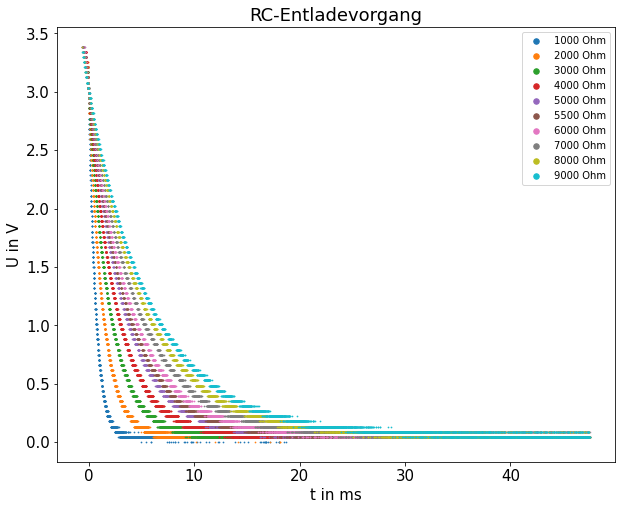

In [36]:
#Daten plotten
for i in range(10):
    plt.scatter(A1t[i]*1000, A1v[i], s = 0.5, label = f"{Ohm[i]} Ohm")
plt.xlabel("t in ms")
plt.ylabel("U in V")
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
for i in range(10):
    lgnd.legendHandles[i]._sizes = [30]
plt.title("RC-Entladevorgang")
plt.show()

Es gilt: 
$$ln(U_C(t))= ln(U_K) - \frac{t}{R \cdot C} $$
Wir erhalten eine lineare Funktion, deren Steigung den Wert 
$\frac{1}{R \cdot C}$ besitzt.

In [37]:
#linearisierte Daten (t -> log(U)) fitten
K1 = np.array([])
K2 = np.array([])
for i in range(10):
    k, cov = curve_fit(linear,A1t[i][:1000:], np.log(A1v[i][:1000:]))
    K1 = np.append(K1,k[0])
    K2 = np.append(K2,k[1])

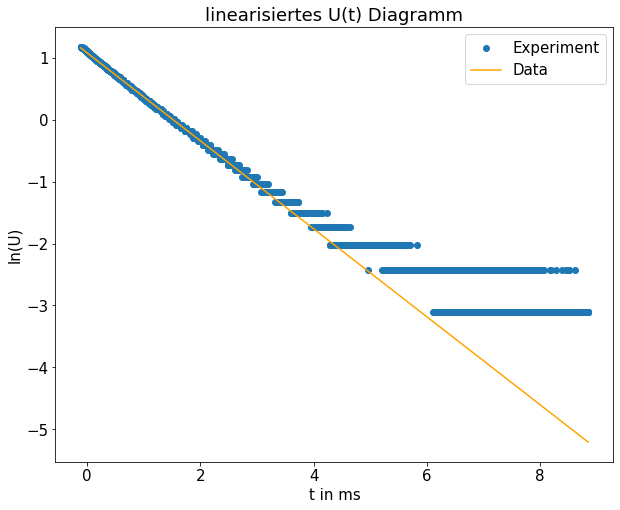

In [38]:
#Fit überprüfen (i kann variiert werden zwischen o und 9)
i = 1
plt.scatter(A1t[i][:3500]*1000, np.log(A1v[i][:3500]), label="Experiment")
plt.plot(A1t[i][:3500]*1000, linear(A1t[i][:3500],K1[i], K2[i]), color="orange", label="Data")
plt.xlabel("t in ms")
plt.ylabel("ln(U)")
plt.legend()
plt.title("linearisiertes U(t) Diagramm")
plt.show()

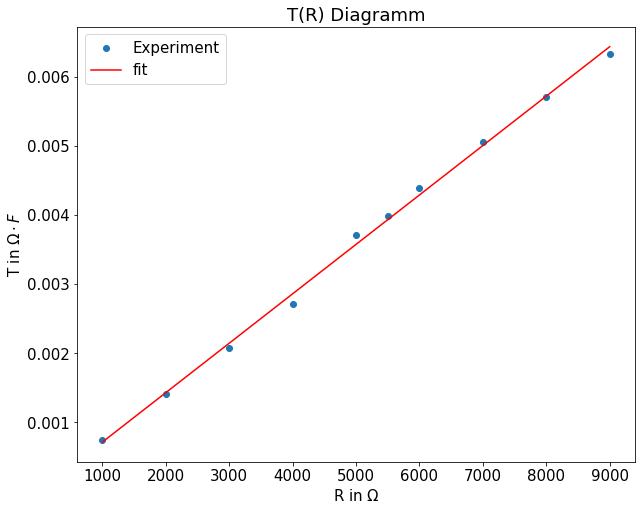

In [39]:
#berechnen Zeitkonstante (R * C) aus Steigung, 
#plotten Zeitkonstante auf Widerstand und bestimmen Steigung (Kapazität)
T = -1/K1

c1, cov1 = curve_fit(linear, Ohm, T)

plt.scatter(Ohm, T, label="Experiment")
plt.plot(Ohm, linear(Ohm, c1[0], c1[1]), label="fit", color = "red")
plt.xlabel("R in $\Omega$")
plt.ylabel(f"T in $\Omega \cdot F$")
plt.legend()
plt.title("T(R) Diagramm")
plt.show()

In [40]:
#Kapazität ausgeben
C = c1[0]
dC = np.sqrt(cov1[0,0])
print(f"C = {np.round(C * 10**9, 0)}+-{np.round(dC*10**9,0)} nF")

C = 715.0+-12.0 nF


<h2>Aufgabe 2</h2>
<p>RC-Ladevorgang: Messen Sie die Zeitabhängigkeit des Ladestroms. Bestimmen Sie $R_x$.</p>

Für den Spannungsabfall an einem Widerstand gilt:
$$U(t) = U_K \cdot exp\left( -\frac{t}{R \cdot C}\right)$$

In [41]:
#Datensatz wird importiert
A2 = pd.DataFrame()
A2 = pd.read_csv(f"./A2/d1.csv",delimiter=";",parse_dates=False, decimal=",")
A2.head()
cut2= 500
A2t = (A2["time"].to_numpy()[cut2::]-A2["time"].to_numpy()[cut2])*10**-3
A2v = A2["voltage"].to_numpy()[cut2::]

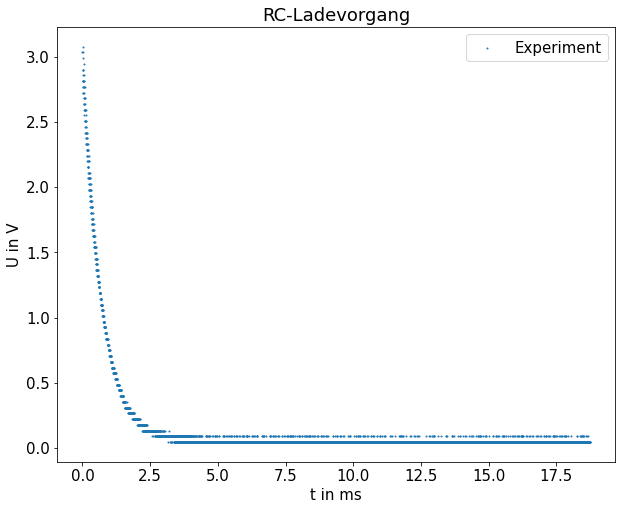

In [42]:
#Datensatz wird geplottet
plt.scatter(A2t*1000, A2v, label="Experiment", s = 1)
plt.xlabel("t in ms")
plt.ylabel("U in V")
plt.legend()
plt.title("RC-Ladevorgang")
plt.show()

In [43]:
#linearisierte Kurve (t -> ln(U)) wird gefittet
K2, cov2 = curve_fit(linear, A2t[:800:], np.log(A2v)[:800:])
dT = cov2[0,0]

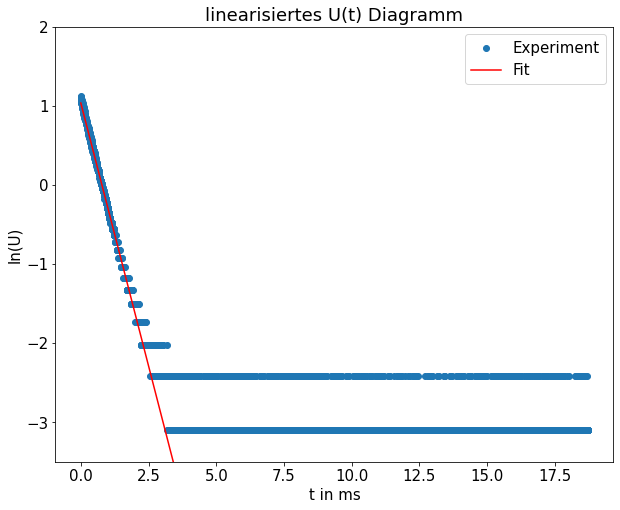

In [44]:
#linearisierte Kurve und zugehöriger Fit wird geplottet
plt.scatter(A2t*1000,np.log(A2v), label="Experiment")
plt.plot(A2t*1000, linear(A2t, K2[0], K2[1]), label="Fit", color="red")
plt.ylim(-3.5,2)
plt.xlabel("t in ms")
plt.ylabel("ln(U)")
plt.legend()
plt.title("linearisiertes U(t) Diagramm")
plt.show()

In [45]:
#Widerstand und Zeitkonstante ausgeben
dK2 = np.sqrt(cov2[0,0])
R2 = np.round(-1/(K2[0]*c1[0]),0)
dR2 = np.round(np.sqrt((dT/(K2[0]**2*c1[0]))**2+(dC/(K2[0]*C**2))**2),0)

T2 = np.round(-1/K2[0],5)
dT2 = np.round(dK2/K2[0]**2,6)

print(f"T = {T2}+-{dT2} s")
print(f"R = {R2}+-{dR2} Ohm")

T = 0.00075+-2e-06 s
R = 1051.0+-19.0 Ohm


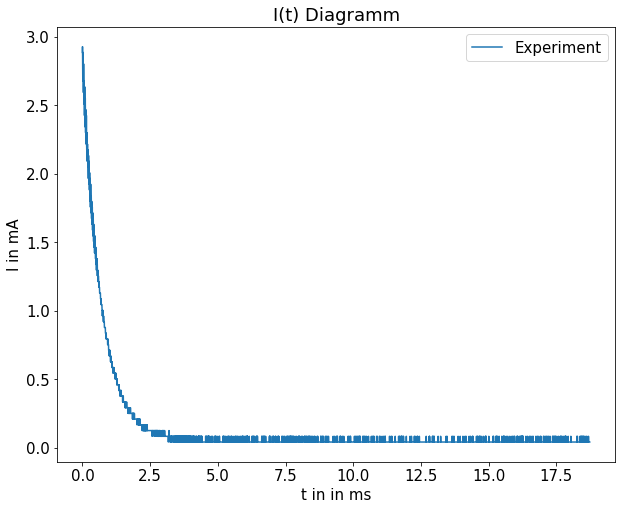

In [46]:
#Strom-Zeit Diagramm
plt.plot(A2t*1000, A2v/R2*1000, label="Experiment")
plt.xlabel("t in in ms")
plt.ylabel("I in mA")
plt.legend()
plt.title("I(t) Diagramm")
plt.show()

<h2>Aufgabe 3</h2>
<p>RL-Einschaltvorgang: Messen Sie die Zeitabhängigkeit der Stromstärke. Bestimmen Sie die
Zeitkonstante durch Anpassung der Modellkurve an die Daten.</p>

In [47]:
#Datensatz einlesen
A3 = pd.DataFrame()
A3 = pd.read_csv(f"./A3/d1.csv",delimiter=";",parse_dates=False, decimal=",")
A3.head()

,time,voltage
0,-1.002899,0.001068
1,-1.001619,0.001068
2,-1.000339,0.001068
3,-0.999059,0.001068
4,-0.997779,0.001068


In [48]:
#Datensatz aufbereiten
cut3= 880
A3t = (A3["time"].to_numpy()[cut3::]-A3["time"].to_numpy()[cut3])*10**-3
A3v = A3["voltage"].to_numpy()[cut3::]

In [49]:
#Fitparameter T (Zeitkonstante) bestimmen
Uk = A3v[-1]

def expo3(t,T):
    return Uk*(1-np.exp(-t/T))

T3, cov3 = curve_fit(expo3, A3t, A3v, p0 = 10**-3)
T3 =np.round(T3[0], 7)
dT3 = np.round(np.sqrt(cov3[0,0]),8)
print(f"T = {T3*10**6}+-{dT3*10**6} µs")

T = 122.6+-0.28 µs


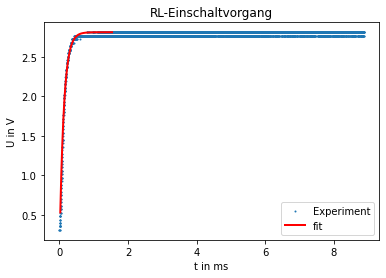

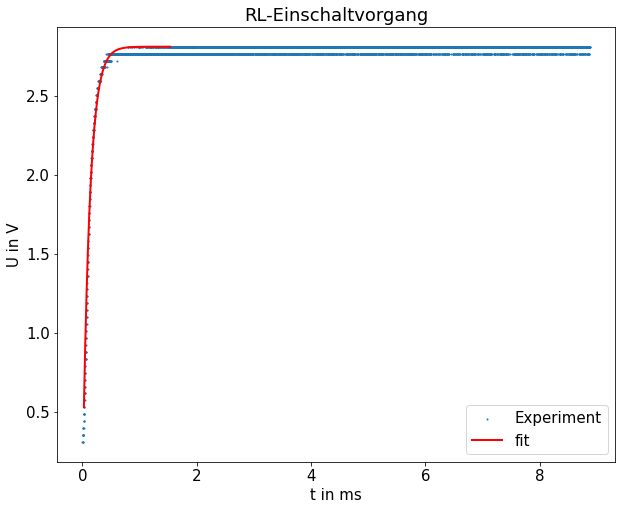

In [50]:
#Datensatz und Fit wird geplottet
plt.scatter(A3t*1000,A3v, s = 1, label="Experiment")
plt.plot(A3t[20:1200:]*1000,expo3(A3t[20:1200:],T3), color="red", linewidth=2, label="fit")
plt.xlabel("t in ms")
plt.ylabel("U in V")
plt.legend()
plt.title("RL-Einschaltvorgang")
plt.show()

In [51]:
R3 = 10
dR3 = 1
L3 = np.round(T3*R3, 5)
dL3 = np.round(np.sqrt((R3*dT3)**2+(T3*dR3)**2), 5)
print(f"L = {L3*10**3}+-{dL3*1000}mH")

L = 1.23+-0.12000000000000001mH
L = 1.23+-0.12000000000000001mH


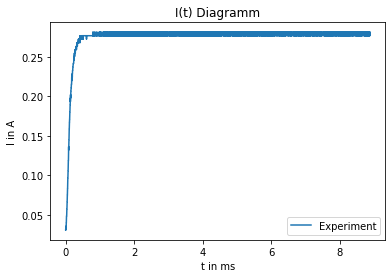

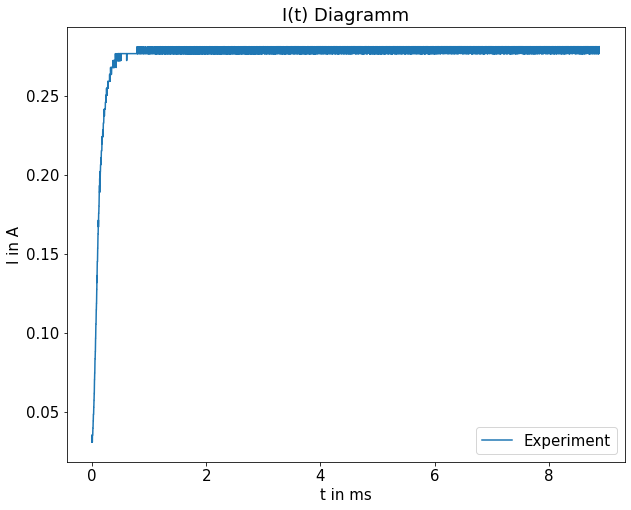

In [52]:
#Stromstärke Plot
plt.plot(A3t*1000, A3v/R3, label="Experiment")
plt.xlabel("t in ms")
plt.ylabel("I in A")
plt.legend()
plt.title("I(t) Diagramm")
plt.show()

<h2>Aufgabe 4</h2>
<p> RL-Ausschaltvorgang: Messen Sie die Zeitabhängigkeit der Spannung über die Spule. Bestimmen
Sie die Zeitkonstante durch Anpassung der Modellkurve an die Daten.</p>

In [53]:
#Datensatz importieren
A4 = pd.DataFrame()
A4 = pd.read_csv(f"./A4/d1.csv",delimiter=";",parse_dates=False, decimal=",")
A4.head()

,time,voltage
0,-1.002899,0.001068
1,-1.001619,0.001068
2,-1.000339,0.001068
3,-0.999059,0.001068
4,-0.997779,0.001068


,time,voltage
0,-1.002899,0.001068
1,-1.001619,0.001068
2,-1.000339,0.001068
3,-0.999059,0.001068
4,-0.997779,0.001068


In [54]:
#Datensatz aufbereiten
cut4= 800
A4t = (A4["time"].to_numpy()[cut4::]-A4["time"].to_numpy()[cut4])*10**-3
A4v = A4["voltage"].to_numpy()[cut4::]-A4["voltage"].to_numpy()[-1]

In [55]:
#Fitparameter T bestimmen
Uk = -A4v[0]
R4 = 200
dR4 = 20

R4sp = 1.3
dR4sp = 0.2

R4p = 220
dR4p = 22

def expo4(t,T):
    return -Uk*(R4+R4p)/(R4+R4sp)*np.exp(-t/T)
T4, cov4 = curve_fit(expo4, A4t, A4v)
T4 = np.round(T4[0], 5)
dT4 = np.round(np.sqrt(cov4[0,0]),6)
print(f"T = {T4*10**6}+-{dT4*10**6}µs")

T = 110.0+-1.0µs
T = 110.0+-1.0µs


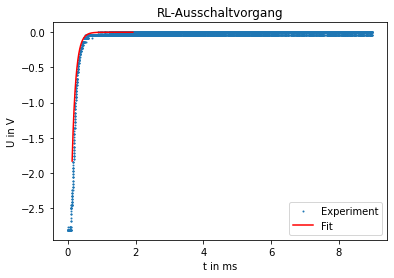

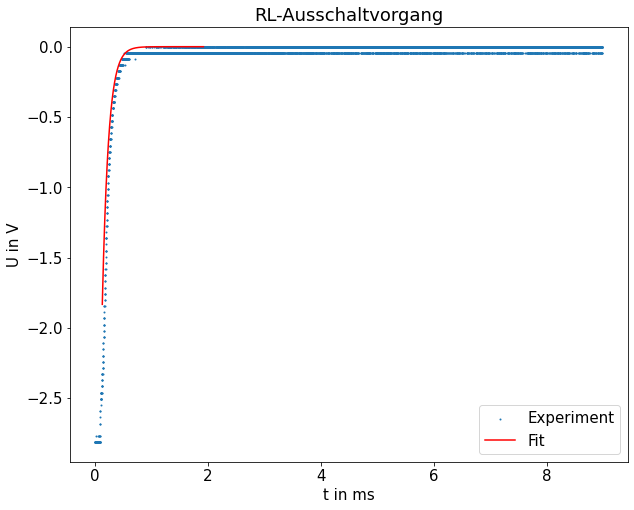

In [56]:
plt.scatter(A4t*10**3,A4v, s = 1, label="Experiment")
plt.plot(A4t[100:1500]*10**3, expo4(A4t[100:1500:], T4), color="red", label="Fit")
plt.xlabel("t in ms")
plt.ylabel("U in V")
plt.legend()
plt.title("RL-Ausschaltvorgang")
plt.show()

In [57]:
L4 = np.round(T4*(R4+R4sp+R4p), 4)
dL4 = np.round(np.sqrt((dT4*(R4+R4sp+R4p))**2+(T4*dR4)**2+(T4*dR4sp)**2+(T4*dR4p)**2),5)
print(f"L = {L4}+-{dL4} H")

L = 0.0463+-0.0033 H
L = 0.0463+-0.0033 H


<h2>Aufgabe 5</h2>
<p> Messen Sie das Ausschwingverhalten eines RLC-Serienkreises. Ermitteln Sie die Frequenz und die
Dämpfung $\delta$ der Schwingung. Stellen Sie mit einem variablen ohmschen Widerstand den
aperiodischen Grenzfall ein.</p>

In [58]:
#Datensätze importieren
A5 = []
for i in range(4):
    a = pd.DataFrame()
    a = pd.read_csv(f"./A5/d{i+1}.csv",delimiter=",",parse_dates=False)
    A5.append(a)
A5[0].head()
R5 = [4,80,290,1053]

In [59]:
#Datensätze aufbereiten
cut5 = 2000
A5t = []
A5v = []
for i in range(4):
    A5t.append((A5[i]["time"].to_numpy()*10**-3)[cut5::])
    A5v.append(A5[i]["voltage"].to_numpy()[cut5::])

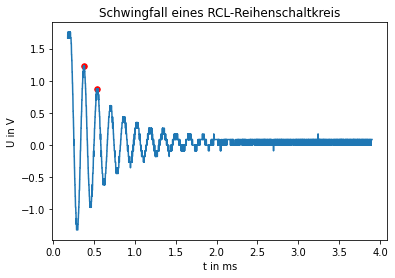

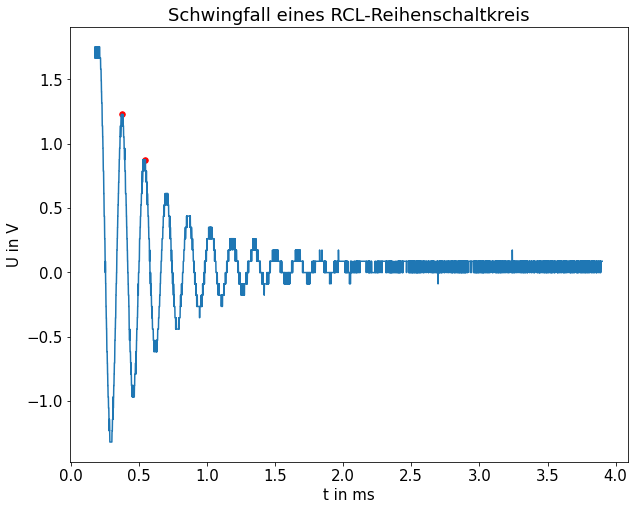

In [60]:
#Plot des Schwingfalls und Bestimmung 
#zweier aufeinanderfolgenden Hochpunkte
i1 = 310
i2 = 570
plt.plot(A5t[0]*10**3,A5v[0])
plt.scatter(A5t[0][i1]*10**3,A5v[0][i1], s=30, color="red")
plt.scatter(A5t[0][i2]*10**3,A5v[0][i2], s=30, color="red")
plt.xlabel("t in ms")
plt.ylabel("U in V")
plt.title("Schwingfall eines RCL-Reihenschaltkreis")
plt.show()

Die Dämpfung lässt sich mithilfe des logarithmischen Dekrements berechnen:

$$ln\left( \frac{U_{max}(t)}{U_{max}(t+T)} \right) = \delta$$
$$ln\left( \frac{U_{max}(t)}{U_{max}(t+T)} \right) \cdot \frac{1}{T}=\delta$$
Für die Frequenz gilt:
$$f=\frac{1}{T}=\frac{1}{t_2-t_1}$$
Für die Induktivität gilt:
$$\delta = \frac{R}{2L}$$
$$L = \frac{R}{2 \delta}$$


In [61]:
#Ausgabe gesuchter Werte mit Unsicherheit
R5s = 4
dR5s = 0.04

U5t = A5v[0][i1]
dU5t = 0.01

U5tT = A5v[0][i2]
dU5tT = 0.01

T5 = (A5t[0][i2]-A5t[0][i1])
dT5 = 10**-5


delta = np.log(A5v[0][i1]/A5v[0][i2])*1/(A5t[0][i2]-A5t[0][i1])
ddelta = np.sqrt((np.log(U5t/U5tT)*1/T5**2*dT5)**2+(1/T5*1/U5t*dU5t)**2+(1/T5*1/U5tT*dU5tT)**2)

f = 1/(A5t[0][i2]-A5t[0][i1])
df = dT5/T5**2

L = R5[0]/(2*delta)
dL = np.sqrt((dR5s/(2*delta))**2+(R5s/(2*delta**2)*ddelta)**2)

print(f"d = {delta}+-{ddelta} Ohm/H")
print(f"f = {f}+-{df} Hz")
print(f"L = {L*10**3}+-{dL*10**3} mH")

d = 2026.552923256525+-148.11561813026017 Ohm/H
f = 6009.615384615384+-361.15477071005904 Hz
L = 0.986897493299185+-0.07280185483818546 mH
d = 2026.552923256525+-148.11561813026017 Ohm/H
f = 6009.615384615384+-361.15477071005904 Hz
L = 0.986897493299185+-0.07280185483818546 mH


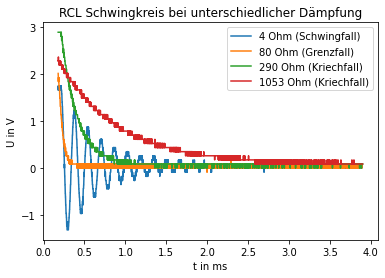

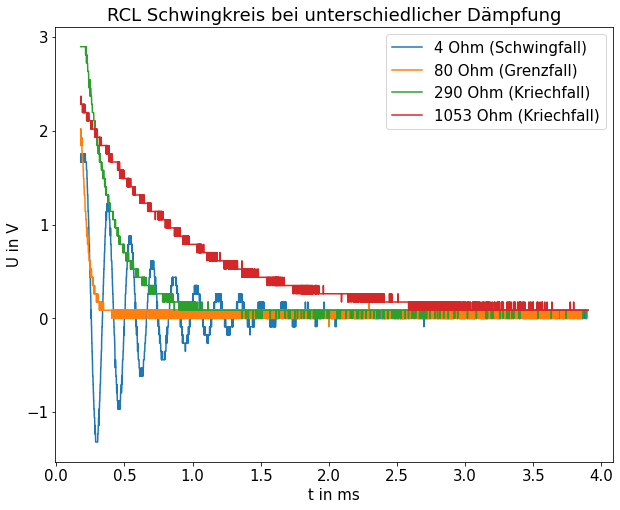

In [62]:
#aperiodischen Grenzfall bestimmen
plt.plot(A5t[0]*10**3,A5v[0], label=f"{R5[0]} Ohm (Schwingfall)")
plt.plot(A5t[1]*10**3,A5v[1], label=f"{R5[1]} Ohm (Grenzfall)")
plt.plot(A5t[2]*10**3,A5v[2], label=f"{R5[2]} Ohm (Kriechfall)")
plt.plot(A5t[3]*10**3,A5v[3], label=f"{R5[3]} Ohm (Kriechfall)")
plt.xlabel("t in ms")
plt.ylabel("U in V")
plt.legend()
plt.title("RCL Schwingkreis bei unterschiedlicher Dämpfung")
plt.show()